#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

import warnings
warnings.filterwarnings(action = 'ignore')

#### Importing the Dataset

In [2]:
dataset = pd.read_csv('concrete_data.csv')
dataset.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


#### Handling Missing Values

In [3]:
dataset.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [4]:
x = dataset.drop(columns = ['Strength'])
y = dataset.iloc[:,-1]

#### Splitting the data into train and test data

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 16)

#### Checking if the data is normally distributed 

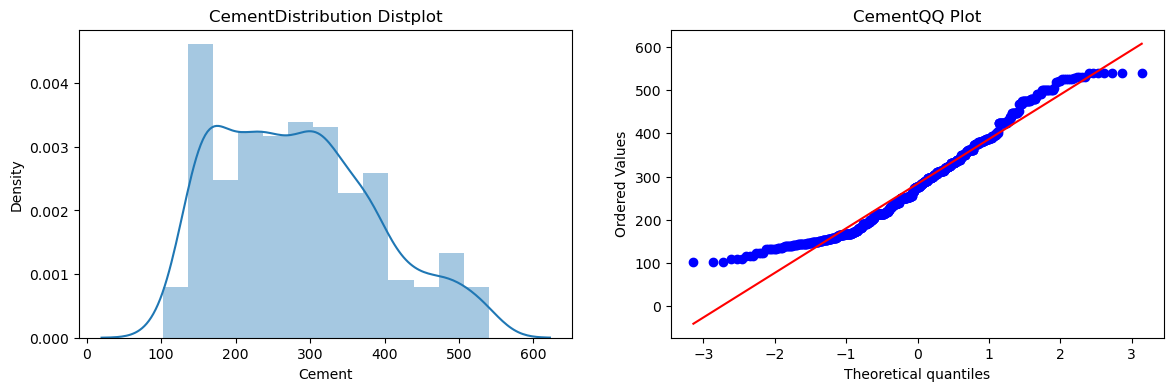

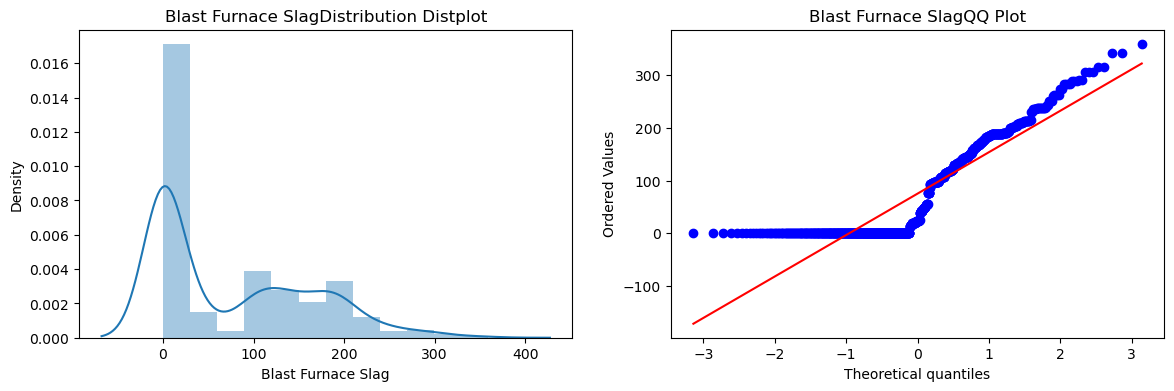

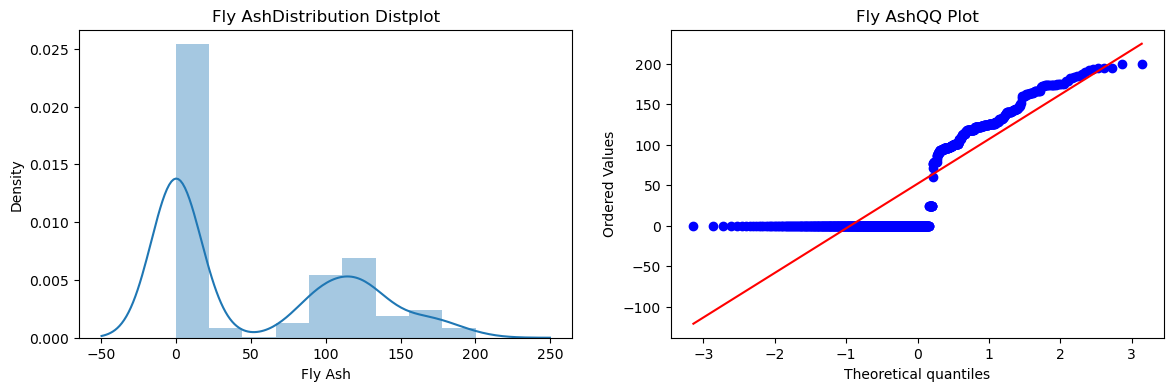

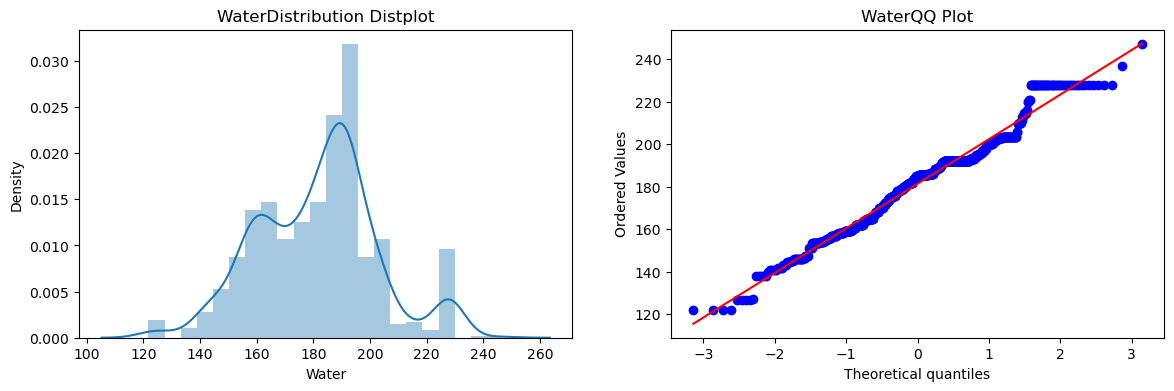

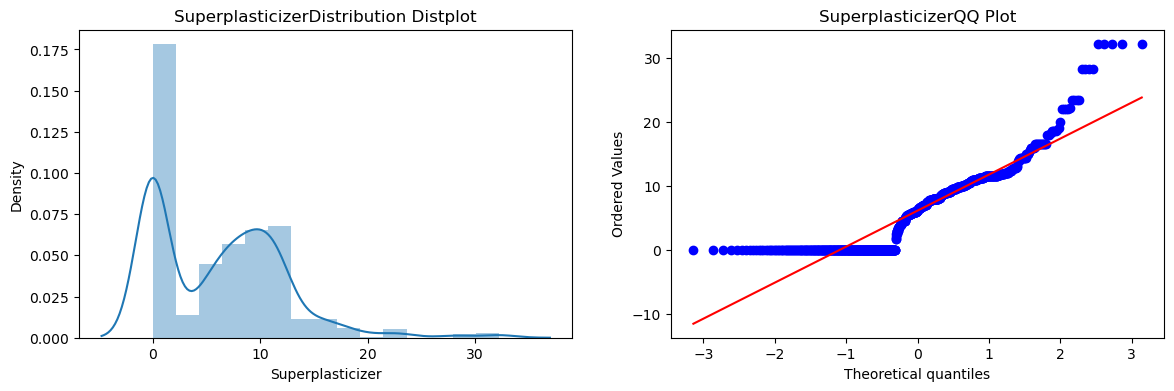

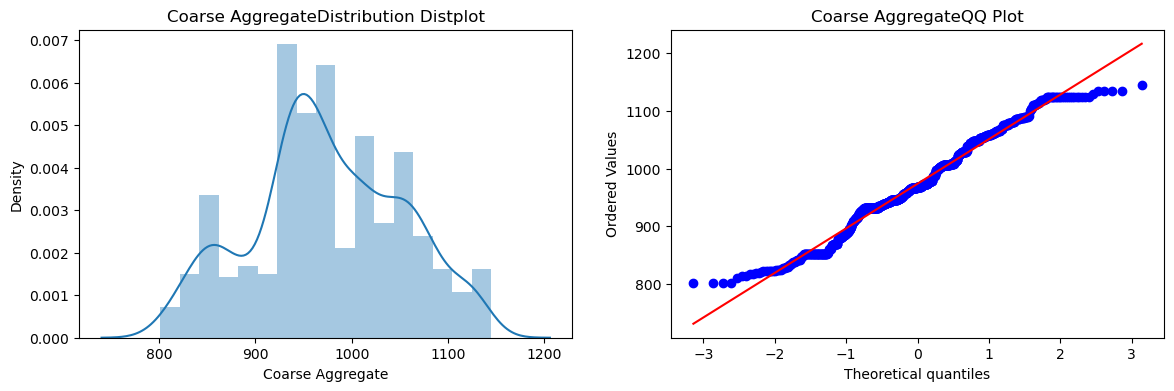

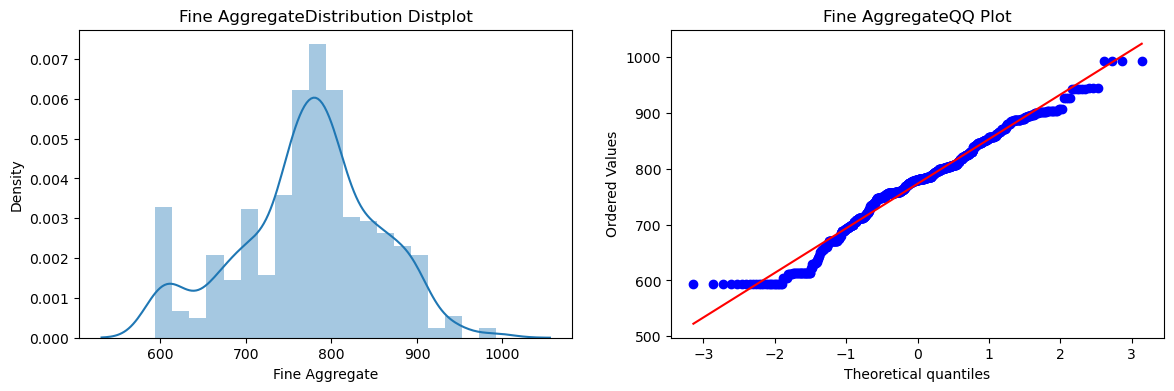

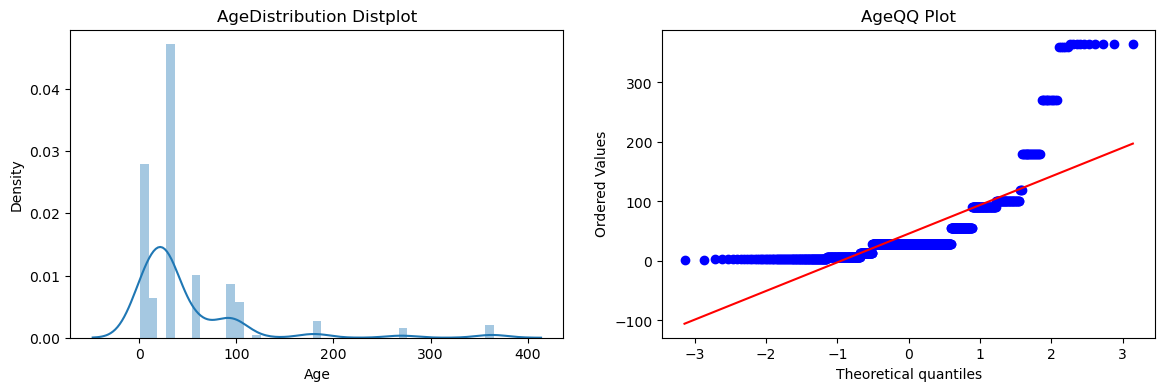

In [6]:
for col in x_train.columns:
    plt.figure(figsize = (14, 4))
    plt.subplot(121)
    sns.distplot(x_train[col])
    plt.title(col + 'Distribution Distplot')

    plt.subplot(122)
    stats.probplot(x_train[col], dist = "norm", plot = plt)
    plt.title(col + 'QQ Plot')

    plt.show()

#### Applying Algorithm and Checking Accuracy

In [7]:
regressor = LinearRegression()

In [8]:
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)


print("Accuracy Linear Regression -", r2_score(y_test, y_pred))

Accuracy Linear Regression - 0.6098286576013501


#### Applying Power Transformer to increase Accuracy

In [9]:
trf = PowerTransformer() #by default this function applies Yeo-Johnson Transformer by=ut you can mannually add transformer using PowerTransformer(method'transformer_name')

x_train_transformed = trf.fit_transform(x_train)
x_test_transformed = trf.transform(x_test)

In [10]:
regressor = LinearRegression()
regressor.fit(x_train_transformed, y_train)

y_pred = regressor.predict(x_test_transformed)

print("Accuracy Linear Regression -", r2_score(y_test, y_pred))

Accuracy Linear Regression - 0.7991518575558015


#### Comparison after using Power Transformer

In [11]:
# Changing numpy array to dataset with columns of original extrain but values of transformed x_train.
# We need to change numpy array to dataset for plotting graphs, else it will give an error.
x_train_transformed = pd.DataFrame(x_train_transformed,columns=x_train.columns)
x_train_transformed

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,0.582787,-1.063775,-0.876167,0.505789,-1.205911,-0.547676,0.864758,-1.693693
1,-1.904037,1.099842,-0.876167,1.041740,-1.205911,-0.199935,0.300689,0.091655
2,-1.186991,0.947167,1.175139,-0.272581,0.570007,0.419224,-0.373316,0.091655
3,-0.624628,1.341121,-0.876167,0.209948,-1.205911,0.042115,-1.050225,-1.073390
4,0.721608,-1.063775,-0.876167,1.018543,-1.205911,0.003495,-0.020550,-1.073390
...,...,...,...,...,...,...,...,...
819,-1.097218,0.803958,1.231882,-0.424905,0.779012,0.430805,-0.373316,0.709553
820,0.296697,-1.063775,-0.876167,0.129836,-1.205911,1.302842,0.234701,-1.073390
821,-0.987216,1.275102,-0.876167,0.209948,-1.205911,0.497715,-0.760639,-1.073390
822,1.606987,0.908224,-0.876167,-0.007107,0.694772,-1.567254,0.061789,0.091655


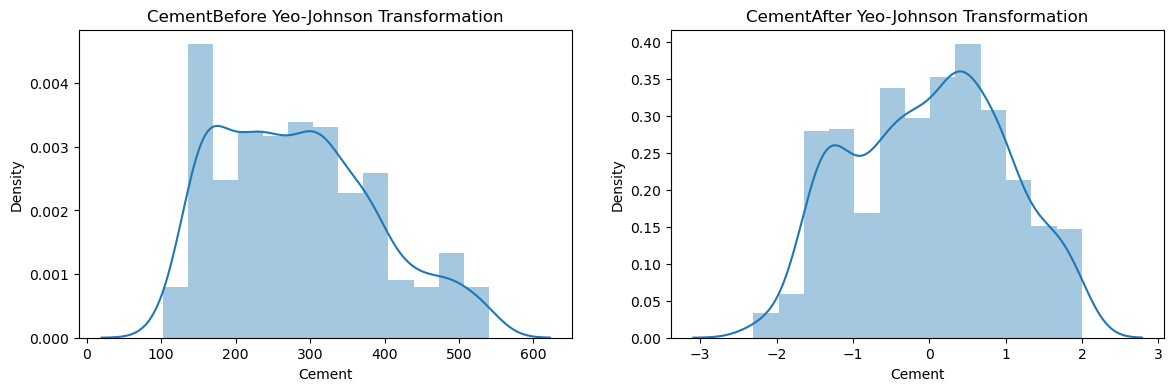

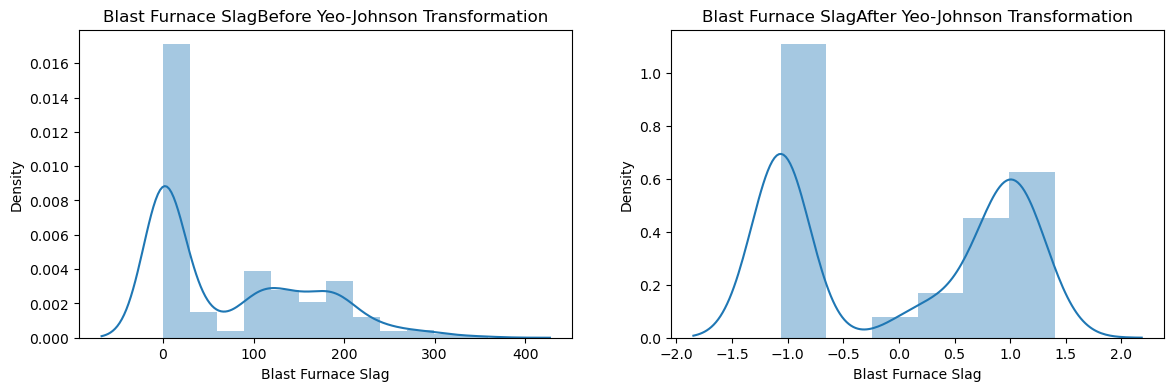

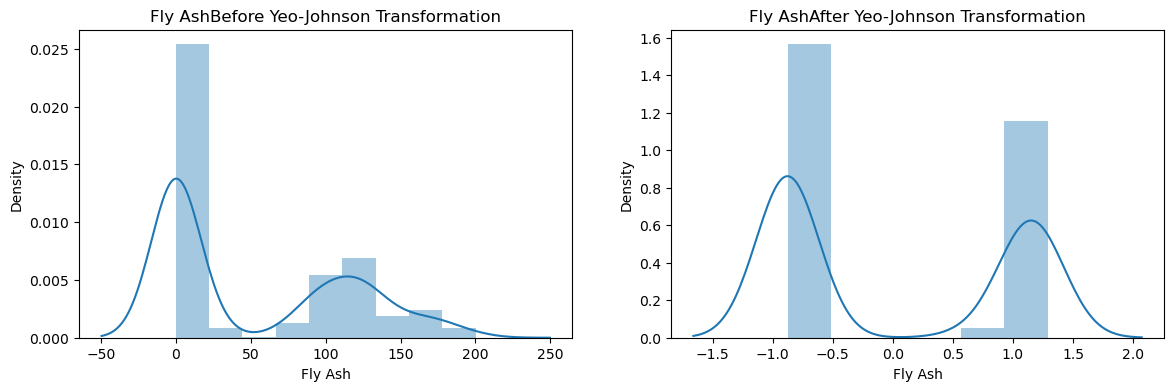

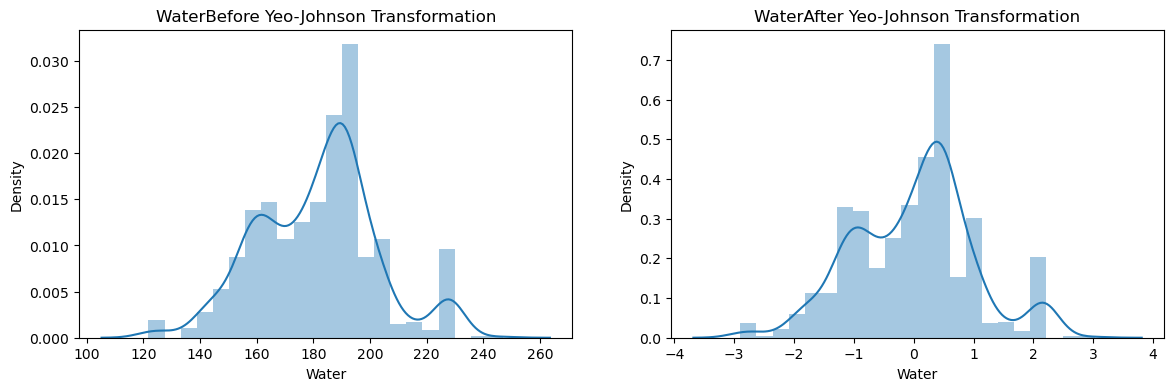

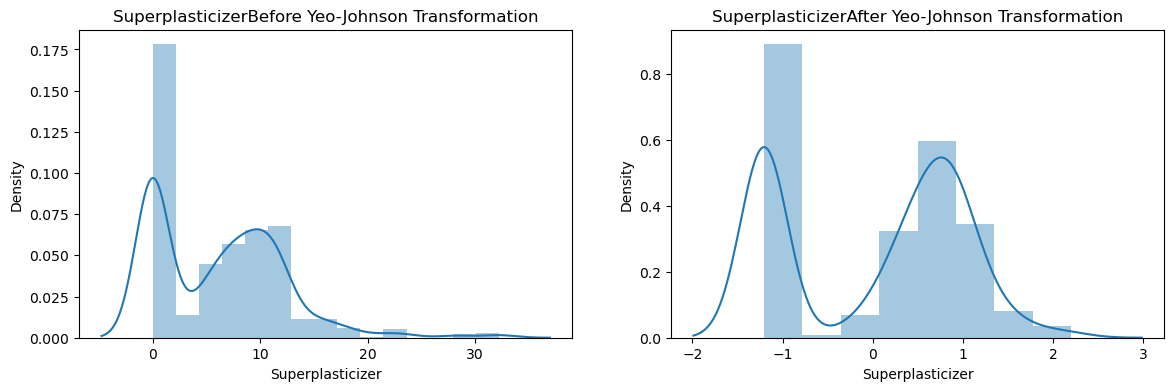

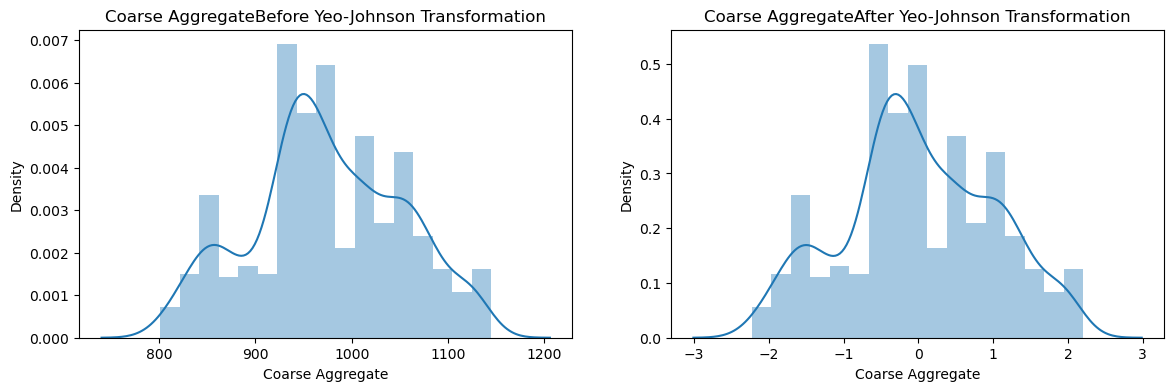

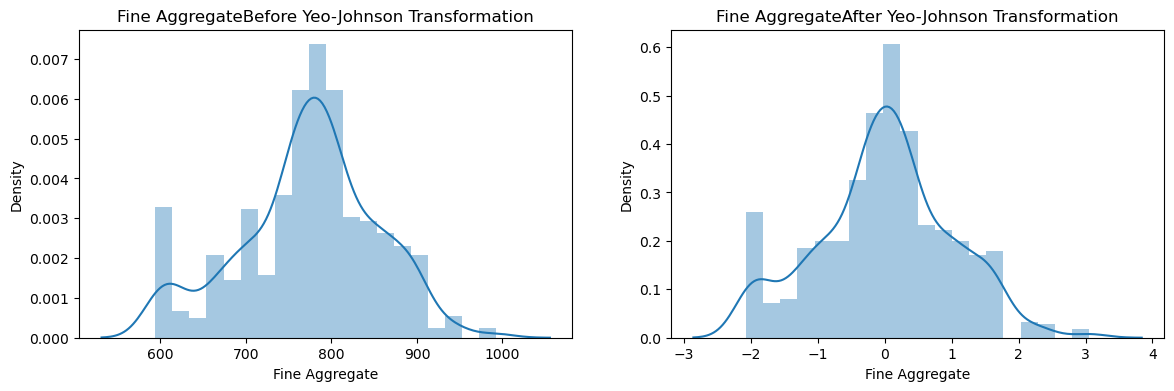

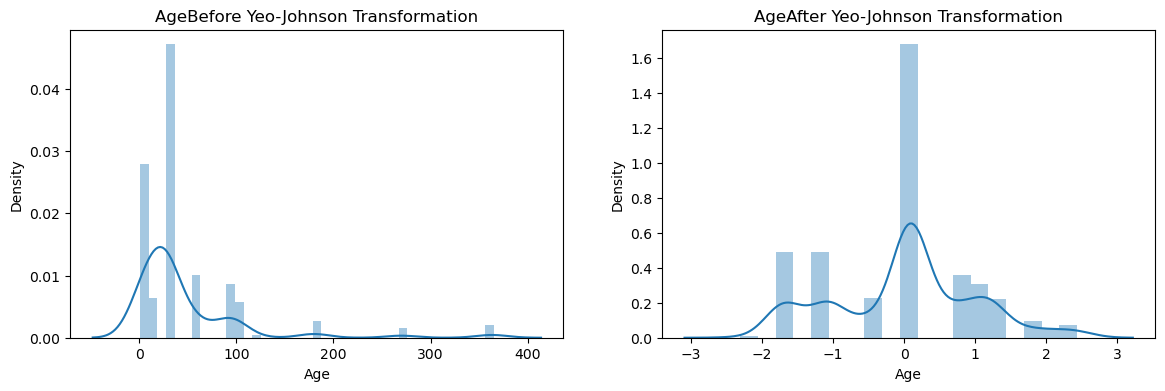

In [12]:
for col in x_train_transformed.columns:
    plt.figure(figsize = (14, 4))
    plt.subplot(121)
    sns.distplot(x_train[col])
    plt.title(col + 'Before Yeo-Johnson Transformation')

    plt.subplot(122)
    sns.distplot(x_train_transformed[col])
    plt.title(col + "After Yeo-Johnson Transformation")

    plt.show()